### <center><font color = #03989e>DATA3001 - Protolytix 🧬</font></center>
<center><center><center><center><center><font color = #03989e>Dharani Palanisamy (z5260276)</font></center>
<center><center><center><center><font color = #03989e>Faiyam Islam (z5258151)</font></center></center></center></center>
<center><center><center><font color = #03989e>Hilary Cao (z5308506)</font></center></center></center>
<center><center><font color = #03989e>Kelly Tao (z5259876)</font></center></center>
<center><font color = #03989e>Pooja Saianand (z5312416)</font></center>

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Importing Packages</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Proteins dataset</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [21]:
data = pd.read_csv('AF-O43526-F1-model_v3.csv')
data.head()

,index,x,y,z,gamma,exp,obs
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0


In [22]:
X = data[['x', 'y', 'z']]

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Dendrogram for Hierarchical Clustering</font></center>
-------------------------------------------------------------------------------------------------------------------------------

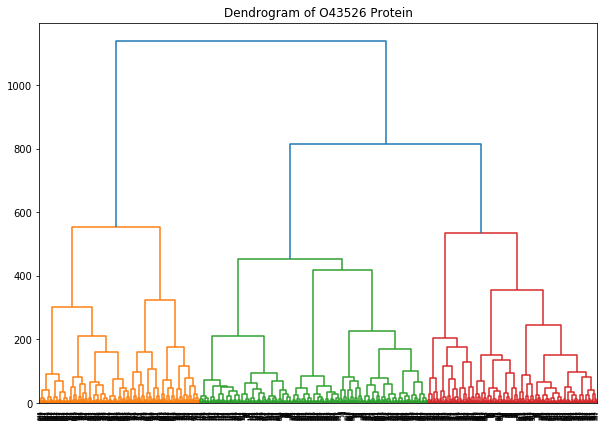

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("Dendrogram of O43526 Protein")
dend = shc.dendrogram(shc.linkage(X, method = 'ward', metric = 'euclidean'))

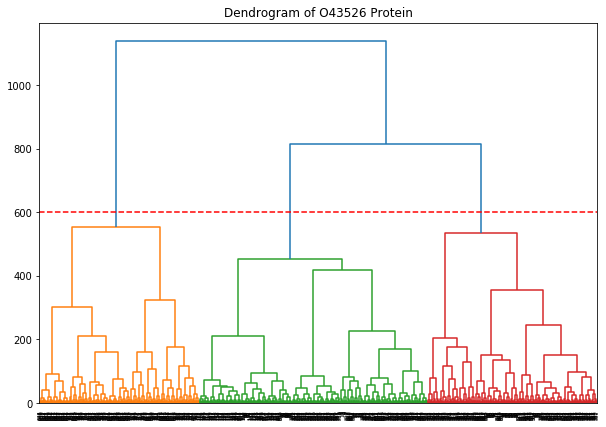

In [5]:
plt.figure(figsize = (10, 7))
plt.title("Dendrogram of O43526 Protein")
dend = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.axhline(y = 600, color = 'r', linestyle = '--')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Agglomerative Clustering Implementation</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit(data)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Text(0, 0.5, 'y')

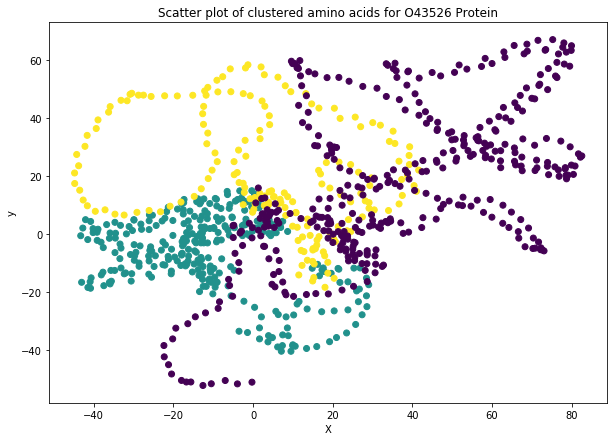

In [25]:
plt.figure(figsize = (10, 7))
plt.scatter(data['x'], data['y'], c = cluster.labels_)
plt.title("Scatter plot of clustered amino acids for O43526 Protein")
plt.xlabel('X')
plt.ylabel('y')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Evaluation Metrics</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [34]:
X = data[['x', 'y', 'z']]
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7) 
for i in index: 
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
    
    print('At K =', i)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

At K = 2
Silhouette Coefficient: 0.321
Calinski-Harabasz Index: 404.423
Davies-Bouldin Index: 1.228
---------------------------------------------------------------
At K = 3
Silhouette Coefficient: 0.282
Calinski-Harabasz Index: 399.719
Davies-Bouldin Index: 1.275
---------------------------------------------------------------
At K = 4
Silhouette Coefficient: 0.265
Calinski-Harabasz Index: 359.728
Davies-Bouldin Index: 1.241
---------------------------------------------------------------
At K = 5
Silhouette Coefficient: 0.287
Calinski-Harabasz Index: 359.789
Davies-Bouldin Index: 1.120
---------------------------------------------------------------
At K = 6
Silhouette Coefficient: 0.279
Calinski-Harabasz Index: 358.869
Davies-Bouldin Index: 1.224
---------------------------------------------------------------


In [37]:
result = {}

for i in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X) 
    db_index = silhouette_score(X, labels) 
    result.update({i : db_index})

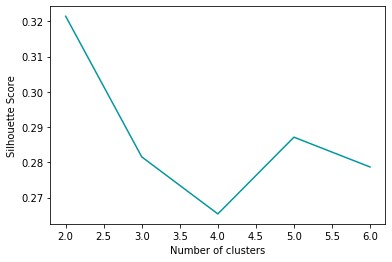

In [38]:
# Visualise 
plt.plot(list(result.keys()), list(result.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [39]:
results = {}

for i in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X)  
    db_index = calinski_harabasz_score(X, labels) 
    results.update({i : db_index})

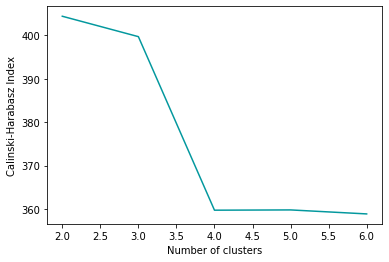

In [40]:
# Visualise 
plt.plot(list(results.keys()), list(results.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [41]:
res = {}

for i in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X) 
    db_index = davies_bouldin_score(X, labels) 
    res.update({i : db_index})

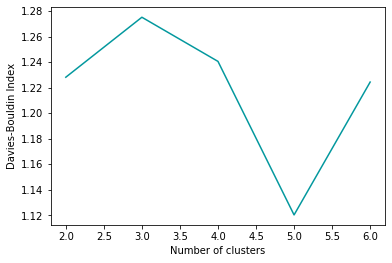

In [42]:
# Visualise 
plt.plot(list(res.keys()), list(res.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>End of Notebook</font></center>
-------------------------------------------------------------------------------------------------------------------------------